           レースID  1着  2着  3着    払戻金
0   202308010101   3   4   1   9440
1   202308010102   6   2   1   6490
2   202308010103   2   1   6   2810
3   202308010104   2   1   4   1690
4   202308010105   5   2   6   7140
..           ...  ..  ..  ..    ...
7   202311302408   4   3   6  18280
8   202311302409   1   5   2   4330
9   202311302410   1   4   3    960
10  202311302411   2   3   6  17000
11  202311302412   1   3   6   1230

[17570 rows x 5 columns]
レース数:  17570 レース
参加レース数:  515 レース
参加率:  2.931 %
平均組合せ数:  1.0 通り
的中率:  16.117 %
ベット総額:  5150000 円
回収総額:  5551000.0 円
回収率:  107.786 %


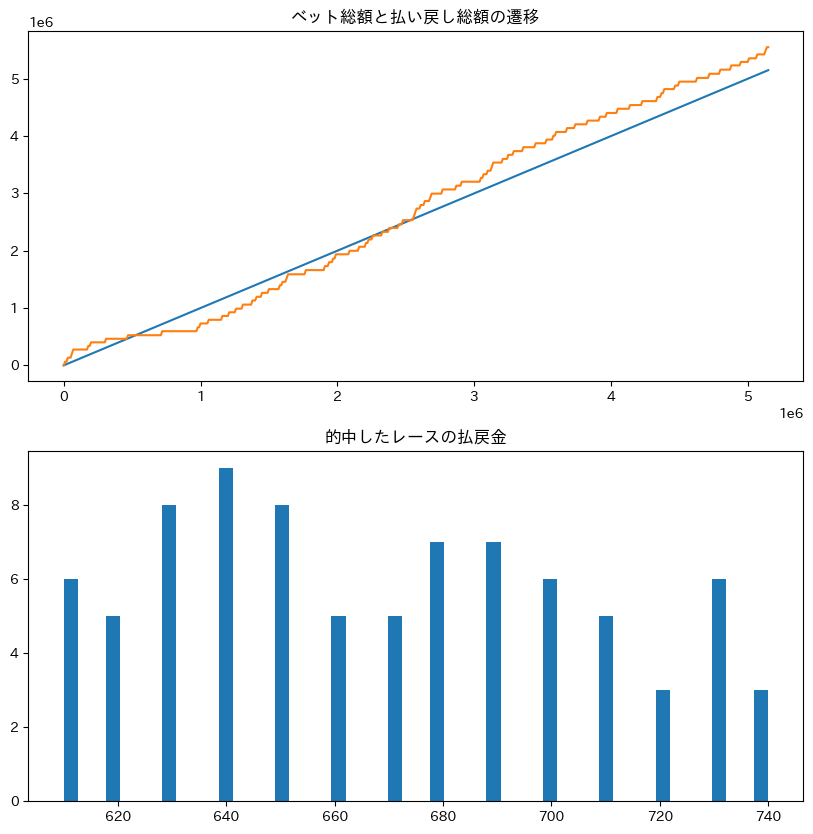

In [1]:

########## 予想を保存したファイル名を指定 ##########

pred_filename = "M1.pkl"

#############################################

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
# !pip install japanize-matplotlib
import japanize_matplotlib

race_place = {"桐生":1,"戸田":2,"江戸川":3,"平和島":4,"多摩川":5,"浜名湖":6,"蒲郡":7,"常滑":8,"津":9,"三国":10,"びわこ":11,"住之江":12,
              "尼崎":13,"鳴門":14,"丸亀":15,"児島":16,"宮島":17,"徳山":18,"下関":19,"若松":20,"芦屋":21,"福岡":22,"唐津":23,"大村":24}

true = pd.read_pickle("tierce.pkl")
true = true.astype({"1着":int,"2着":int,"3着":int,"払戻金":int})
print(true)
pred = pd.read_pickle(pred_filename)
# レース数
racenum = 0
# 参加数
joinnum = 0
# 組合せ数リスト
combination_list = []
# ベット総額リスト
betnum_list = [0]
# 払戻総額リスト(総額の変遷)
payout_list = [0]
# 払戻金リスト
payout_list_2 = []
# 的中回数
getnum = 0
# 的中フラグ
flag = 0

# 正解データを上から1つ選択
for race in range(len(true)):
    result = true.iloc[race,:]
    racenum += 1
    pred_df = pred[pred["レースID"] == result["レースID"]]
    # 参加しているか？
    if len(pred_df) > 0:
        # 参加+1
        joinnum += 1
        # 組合せリスト追加
        combination_list.append(len(pred_df))
        # ベット総額変遷リスト追加
        betnum_list.append(betnum_list[-1] + sum(pred_df["ベット額"]))
        # 的中があるか？
        for i in range(len(pred_df)):
            # 的中か？
            if (pred_df.iloc[i]["1着"] == result["1着"]) and (pred_df.iloc[i]["2着"] == result["2着"]) and (pred_df.iloc[i]["3着"] == result["3着"]):
                flag = 1
                payout_list.append(payout_list[-1] + result["払戻金"]*pred_df.iloc[i]["ベット額"]/100)
                payout_list_2.append(result["払戻金"])
                getnum += 1
        if flag == 0:
            payout_list.append(payout_list[-1])
        else:
            flag = 0

print("レース数: ", len(true), "レース")
print("参加レース数: ", joinnum, "レース")
print("参加率: ", round(joinnum*100/racenum,3), "%")
print("平均組合せ数: ", round(sum(combination_list)/len(combination_list), 3), "通り")
print("的中率: ", round(getnum*100/joinnum,3), "%")
print("ベット総額: ", betnum_list[-1], "円")
print("回収総額: ", payout_list[-1], "円")
print("回収率: ", round(payout_list[-1]*100/betnum_list[-1],3), "%")

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = np.arange(0, betnum_list[-1])
y = x
ax1.plot(x,y)
ax1.plot(betnum_list, payout_list)
ax1.set_title("ベット総額と払い戻し総額の遷移")
ax2.hist(payout_list_2, bins=50)
ax2.set_title("的中したレースの払戻金")
plt.show()